In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb


In [2]:
Data = pd.read_excel('10 stocks (2).xlsx')
datetime_series = pd.to_datetime(Data['Date'])
datetime_index = pd.DatetimeIndex(datetime_series.values)
Data=Data.set_index(datetime_index)
Data.drop('Date',axis=1,inplace=True)
Data.head()

,PFGDAAU LX Equity,AIBALMA AB Equity,CCASORI MK Equity,BBFTOP3 KY Equity,BCUSDLF KK Equity,PGPGIFA ID Equity,ALCONGP AB Equity,BUTIBLI KY Equity,PGPCBFA ID Equity,SCHGTRA LX Equity
2020-04-17,124.39,16.6991,2.5766,1275.83,10.76,1.201,1.5334,29.97,1.779,107.9620
2020-04-24,124.39,16.8738,2.5808,1276.46,10.77,1.201,1.5345,29.32,1.764,107.9444
2020-05-01,125.93,16.6996,2.5811,1276.78,10.77,1.203,1.5310,30.00,1.804,108.6293
2020-05-08,125.93,16.8233,2.5871,1278.59,10.77,1.204,1.5408,29.84,1.819,108.6894
2020-05-15,125.93,16.9853,2.5927,1279.82,10.78,1.212,1.5415,29.95,1.793,108.4216


In [3]:
# Log of percentage change of all stocks in the list
Ret= Data.pct_change().apply(lambda x: np.log(1+x)) # CONVERT TO RETURN
Ret.head()

,PFGDAAU LX Equity,AIBALMA AB Equity,CCASORI MK Equity,BBFTOP3 KY Equity,BCUSDLF KK Equity,PGPGIFA ID Equity,ALCONGP AB Equity,BUTIBLI KY Equity,PGPCBFA ID Equity,SCHGTRA LX Equity
2020-04-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-24,0.000000,0.010407,0.001629,0.000494,0.000929,0.000000,0.000717,-0.021927,-0.008467,-0.000163
2020-05-01,0.012304,-0.010377,0.000116,0.000251,0.000000,0.001664,-0.002283,0.022928,0.022422,0.006325
2020-05-08,0.000000,0.007380,0.002322,0.001417,0.000000,0.000831,0.006381,-0.005348,0.008280,0.000553
2020-05-15,0.000000,0.009583,0.002162,0.000962,0.000928,0.006623,0.000454,0.003680,-0.014397,-0.002467


In [4]:
Ann_Ret = Ret.mean()*52
print (Ann_Ret)

PFGDAAU LX Equity    0.210002
AIBALMA AB Equity    0.164994
CCASORI MK Equity    0.077905
BBFTOP3 KY Equity    0.059322
BCUSDLF KK Equity    0.007076
PGPGIFA ID Equity    0.061577
ALCONGP AB Equity    0.051767
BUTIBLI KY Equity    0.135671
PGPCBFA ID Equity    0.186455
SCHGTRA LX Equity    0.094031
dtype: float64


In [5]:
Ann_Risk=Ret.std()*(52)**(0.5)
print(Ann_Risk)

PFGDAAU LX Equity    0.086571
AIBALMA AB Equity    0.052010
CCASORI MK Equity    0.016388
BBFTOP3 KY Equity    0.011316
BCUSDLF KK Equity    0.002373
PGPGIFA ID Equity    0.022152
ALCONGP AB Equity    0.043235
BUTIBLI KY Equity    0.080982
PGPCBFA ID Equity    0.149274
SCHGTRA LX Equity    0.046193
dtype: float64


In [6]:
Ret_Covar = Ret.cov()
print(Ret_Covar)



                   PFGDAAU LX Equity  AIBALMA AB Equity  CCASORI MK Equity  \
PFGDAAU LX Equity       1.441265e-04      -1.634953e-06      -7.756574e-06   
AIBALMA AB Equity      -1.634953e-06       5.201934e-05       4.462164e-06   
CCASORI MK Equity      -7.756574e-06       4.462164e-06       5.164686e-06   
BBFTOP3 KY Equity      -3.080687e-06      -6.997817e-09       4.558075e-08   
BCUSDLF KK Equity      -1.469539e-07       2.804106e-07       1.870341e-08   
PGPGIFA ID Equity      -4.431239e-07       5.832823e-06       5.748516e-07   
ALCONGP AB Equity      -2.627961e-06       1.708763e-05       3.201214e-06   
BUTIBLI KY Equity       8.840649e-06       1.693858e-05       1.041013e-06   
PGPCBFA ID Equity      -2.000941e-06       3.830546e-05       2.021633e-05   
SCHGTRA LX Equity      -7.136008e-07       2.093886e-05       6.136744e-06   

                   BBFTOP3 KY Equity  BCUSDLF KK Equity  PGPGIFA ID Equity  \
PFGDAAU LX Equity      -3.080687e-06      -1.469539e-07      -4

In [7]:
# Yearly returns for individual companies
ind_er = Data.resample('Y').last().pct_change().mean()
ind_er

PFGDAAU LX Equity    0.145453
AIBALMA AB Equity    0.076369
CCASORI MK Equity    0.038140
BBFTOP3 KY Equity    0.040926
BCUSDLF KK Equity    0.002768
PGPGIFA ID Equity    0.021034
ALCONGP AB Equity    0.017065
BUTIBLI KY Equity    0.049820
PGPCBFA ID Equity    0.023058
SCHGTRA LX Equity    0.021886
dtype: float64

In [8]:
Ret_Corr = Ret.corr()
#print(Ret_Corr)

In [9]:
# Log of percentage change and creeate Covariance matrix
cov_matrix = Data.pct_change().apply(lambda x: np.log(1+x)).cov()
#cov_matrix


In [10]:
Data.columns


Index(['PFGDAAU LX Equity', 'AIBALMA AB Equity', 'CCASORI MK Equity',
       'BBFTOP3 KY Equity', 'BCUSDLF KK Equity', 'PGPGIFA ID Equity',
       'ALCONGP AB Equity', 'BUTIBLI KY Equity', 'PGPCBFA ID Equity',
       'SCHGTRA LX Equity'],
      dtype='object')

In [11]:
Ret_risk=(Ann_Ret/Ann_Risk)
print(Ret_risk)

PFGDAAU LX Equity    2.425769
AIBALMA AB Equity    3.172365
CCASORI MK Equity    4.753824
BBFTOP3 KY Equity    5.242223
BCUSDLF KK Equity    2.982097
PGPGIFA ID Equity    2.779728
ALCONGP AB Equity    1.197332
BUTIBLI KY Equity    1.675332
PGPCBFA ID Equity    1.249082
SCHGTRA LX Equity    2.035596
dtype: float64


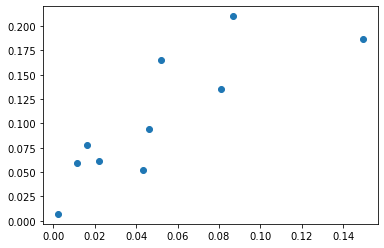

In [12]:
x=Ann_Risk
y=Ann_Ret
plt.scatter(x,y)
plt.show()

In [13]:
assets = pd.concat([Ann_Ret,Ann_Risk,Ret_risk], axis=1)
assets.columns = ['Ann Returns', 'Ann Risk', 'Return Risk Ratio']
assets

,Ann Returns,Ann Risk,Return Risk Ratio
PFGDAAU LX Equity,0.210002,0.086571,2.425769
AIBALMA AB Equity,0.164994,0.052010,3.172365
CCASORI MK Equity,0.077905,0.016388,4.753824
BBFTOP3 KY Equity,0.059322,0.011316,5.242223
BCUSDLF KK Equity,0.007076,0.002373,2.982097
PGPGIFA ID Equity,0.061577,0.022152,2.779728
ALCONGP AB Equity,0.051767,0.043235,1.197332
BUTIBLI KY Equity,0.135671,0.080982,1.675332
PGPCBFA ID Equity,0.186455,0.149274,1.249082
SCHGTRA LX Equity,0.094031,0.046193,2.035596


<AxesSubplot:>

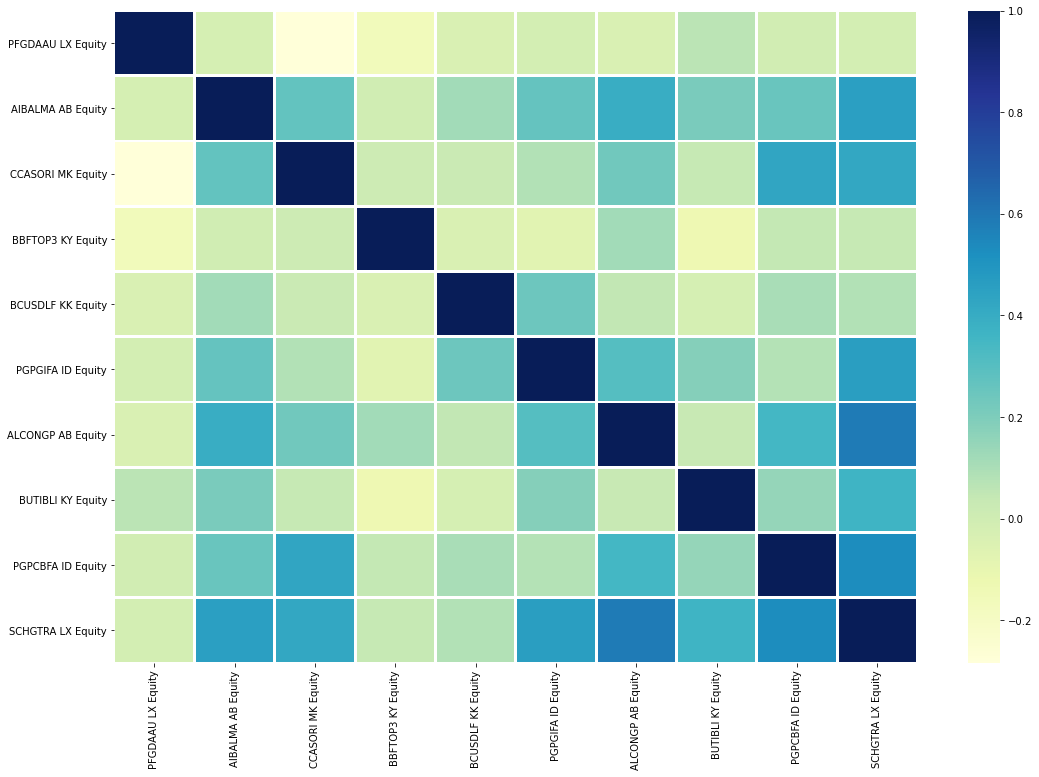

In [14]:
plt.subplots(figsize=(18, 12))
sb.heatmap(Ret_Corr, linewidths=1.8, cmap="YlGnBu" )

In [15]:
w = [1/len(Data.columns)]*len(Data.columns)
port_var = Ret_Covar.mul(w, axis=0).mul(w, axis=1).sum().sum()
Ann_port_std = (port_var*52)**(0.5)
Ann_port_std

0.028404716751292476

In [16]:
port_er = (w*Ann_Ret).sum()
port_er

0.10487991902201751

In [17]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(Data.columns)
num_portfolios = 100000

In [18]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights,Ann_Ret) 
    p_ret.append(returns)
    var = Ret_Covar.mul(weights, axis=0).mul(weights, axis=1).sum().sum() # Portfolio Variance
    sd = np.sqrt(var) #Weekly standard deviation
    ann_sd = sd*np.sqrt(52) #Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [19]:
data = {'Returns':p_ret, 'Risk':p_vol}
for counter, symbol in enumerate(Data.columns.tolist()):
#print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]
portfolios = pd.DataFrame(data)
portfolios.head() # Dataframe of the 100000 portfolios created

,Returns,Risk,PFGDAAU LX Equity weight,AIBALMA AB Equity weight,CCASORI MK Equity weight,BBFTOP3 KY Equity weight,BCUSDLF KK Equity weight,PGPGIFA ID Equity weight,ALCONGP AB Equity weight,BUTIBLI KY Equity weight,PGPCBFA ID Equity weight,SCHGTRA LX Equity weight
0,0.106217,0.030681,0.013963,0.163816,0.201493,0.036202,0.092472,0.123778,0.034123,0.206693,0.090253,0.037206
1,0.105588,0.032568,0.101634,0.073239,0.026316,0.144848,0.161924,0.056762,0.088094,0.157002,0.142098,0.048082
2,0.102090,0.027515,0.107163,0.112607,0.024403,0.143218,0.117770,0.031695,0.145004,0.096034,0.069291,0.152814
3,0.094597,0.023326,0.093823,0.013347,0.112524,0.109818,0.074125,0.267928,0.023654,0.131142,0.054573,0.119066
4,0.082307,0.022242,0.044310,0.053284,0.047929,0.137252,0.218191,0.174977,0.074951,0.168850,0.061471,0.018785


<AxesSubplot:xlabel='Risk', ylabel='Returns'>

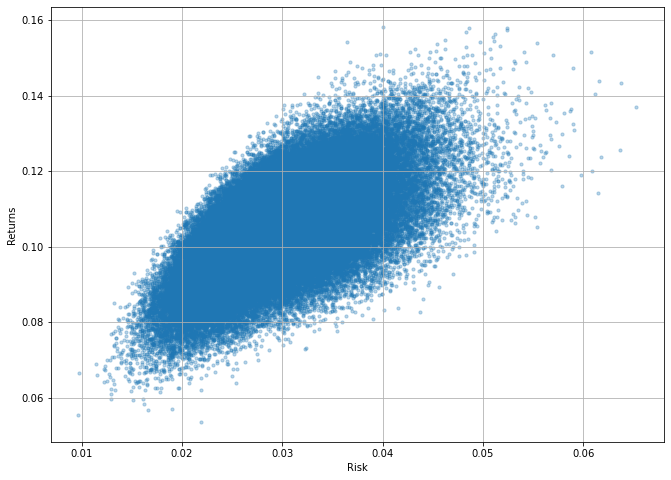

In [20]:
portfolios.plot.scatter(x='Risk', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[11, 8])

In [21]:
min_vol_port = portfolios.iloc[portfolios['Risk'].idxmin()]
# idxmin() gives us the minimum value in the column specified.
min_vol_port

Returns                     0.055478
Risk                        0.009670
PFGDAAU LX Equity weight    0.068851
AIBALMA AB Equity weight    0.015379
CCASORI MK Equity weight    0.060024
BBFTOP3 KY Equity weight    0.207587
BCUSDLF KK Equity weight    0.377699
PGPGIFA ID Equity weight    0.154097
ALCONGP AB Equity weight    0.063507
BUTIBLI KY Equity weight    0.008618
PGPCBFA ID Equity weight    0.007719
SCHGTRA LX Equity weight    0.036519
Name: 40141, dtype: float64

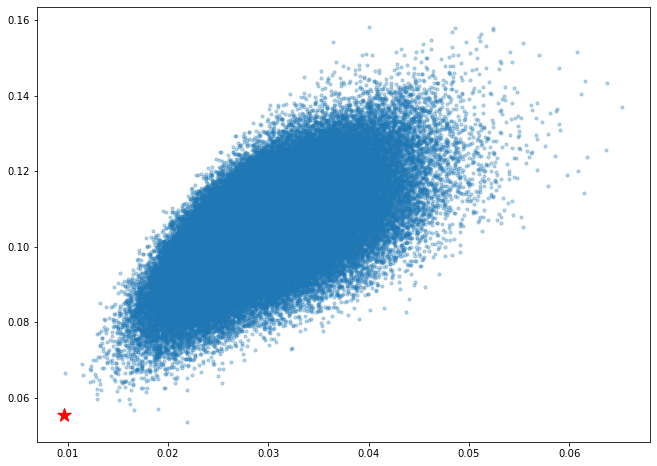

In [22]:
plt.subplots(figsize=[11, 8])
plt.scatter(portfolios['Risk'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=200)

In [23]:
# Finding the optimal portfolio
rf = 0.05 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Risk']).idxmax()]
optimal_risky_port

Returns                     0.109396
Risk                        0.019515
PFGDAAU LX Equity weight    0.175905
AIBALMA AB Equity weight    0.131707
CCASORI MK Equity weight    0.248495
BBFTOP3 KY Equity weight    0.257113
BCUSDLF KK Equity weight    0.014300
PGPGIFA ID Equity weight    0.046665
ALCONGP AB Equity weight    0.032651
BUTIBLI KY Equity weight    0.013721
PGPCBFA ID Equity weight    0.022901
SCHGTRA LX Equity weight    0.056543
Name: 90403, dtype: float64

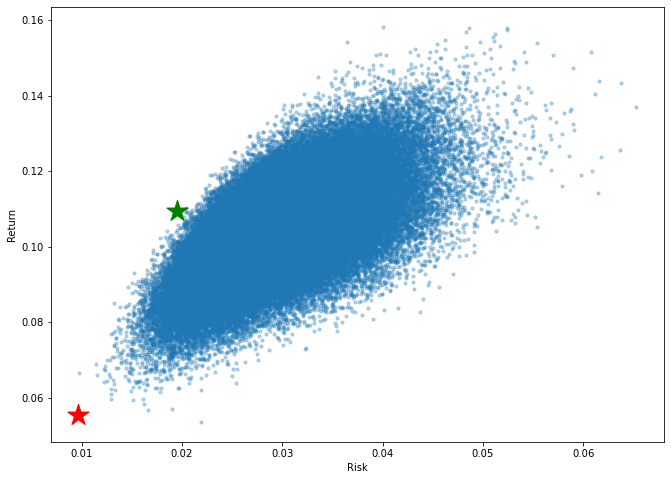

In [24]:
plt.subplots(figsize=(11, 8))
plt.scatter(portfolios['Risk'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)
plt.xlabel("Risk")
plt.ylabel("Return")
plt.show()

In [25]:
Ret_Corr.to_csv(r'Correlation Matrix .csv')

In [29]:
assets.to_csv(r'RR.csv')